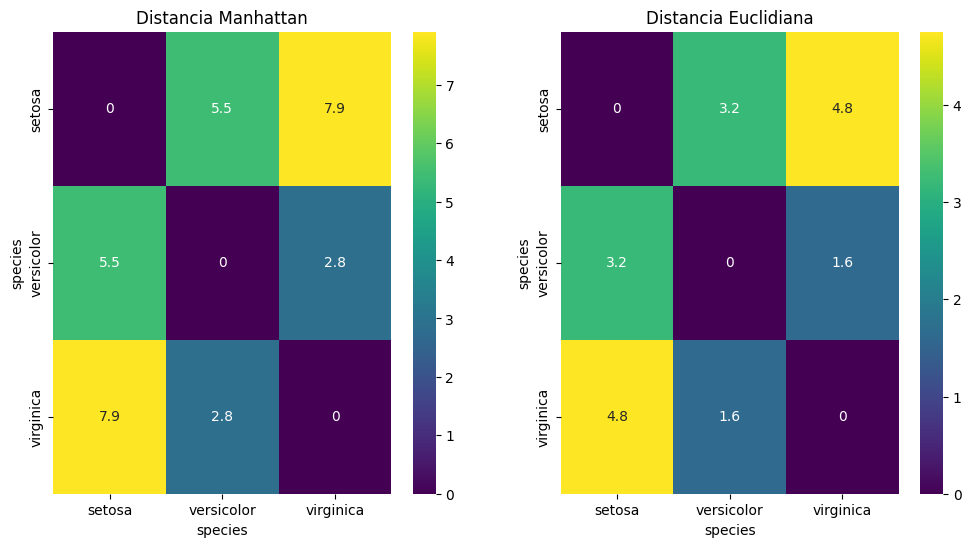

In [12]:
import pandas as pd
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import cityblock, euclidean

# Cargar el conjunto de datos Iris
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target_names[iris.target]

# Calcular el promedio de las medidas de las flores de cada especie
species_means = df.groupby('species').mean()

# Crear DataFrames separados para almacenar las distancias Manhattan y Euclidiana
distances_manhattan = pd.DataFrame(index=species_means.index, columns=species_means.index)
distances_euclidean = pd.DataFrame(index=species_means.index, columns=species_means.index)

# Calcular la distancia Manhattan y euclidiana entre cada par de promedios
# y guardarlas en los DataFrames correspondientes
for species1 in species_means.index:
    for species2 in species_means.index:
        # Asignar la distancia Manhattan al DataFrame distances_manhattan
        distances_manhattan.loc[species1, species2] = cityblock(species_means.loc[species1], species_means.loc[species2])
        # Asignar la distancia Euclidiana al DataFrame distances_euclidean
        distances_euclidean.loc[species1, species2] = euclidean(species_means.loc[species1], species_means.loc[species2])

# Convertir los valores a tipo float (esto ya no debería ser problemático)
distances_manhattan = distances_manhattan.astype(float)
distances_euclidean = distances_euclidean.astype(float)

# Graficar las distancias (Manhattan)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.heatmap(distances_manhattan, annot=True, cmap='viridis', ax=axes[0])
axes[0].set_title('Distancia Manhattan')

# Graficar las distancias (Euclidiana)
sns.heatmap(distances_euclidean, annot=True, cmap='viridis', ax=axes[1])
axes[1].set_title('Distancia Euclidiana')

plt.show()

# Nueva sección

# Nueva sección